In this file we can test the performance of multiple TST structures, for various datasets and assess the time every execution takes. 

In [35]:
import random
import time
import matplotlib.pyplot as plt
from ternary_tree import TernarySearchTree
from ternary_tree_B import TernarySearchTreeB


with open('data/corncob_lowercase.txt') as file:
    words = [line.strip() for line in file]

sizes = [10, 100, 1000, 10000, 50000]
samples = [
    random.sample(words, k=size) for size in sizes
]

# Insertion time Assessment

In [36]:
nr_runs = 100
times = {"ternary_tree_A": {}, "ternary_tree_B": {}}
insert_sample = random.sample(words, k=20)
for sample in samples:
    tsts = {
    "ternary_tree_A": TernarySearchTree(),
    "ternary_tree_B": TernarySearchTreeB()
    }
    for word in sample:
        for tst_name, tst in tsts.items():
            tst.insert(word)
    
    for tst_name in tsts.keys():
        times[tst_name][len(sample)] = 0.0
        
    for _ in range(nr_runs):
        for tstname, tst in tsts.items():
            start_time = time.time_ns()
            for word in insert_sample:
                tst.insert(word)
            end_time = time.time_ns()
            times[tst_name][len(sample)] += end_time - start_time
    
    for tst_name in tsts.keys():
        times[tst_name][len(sample)] /= nr_runs * 1_000_000.0

times

{'ternary_tree_A': {10: 0.0, 100: 0.0, 1000: 0.0, 10000: 0.0, 50000: 0.0},
 'ternary_tree_B': {10: 0.256307,
  100: 0.287467,
  1000: 0.336452,
  10000: 0.425017,
  50000: 0.333508}}

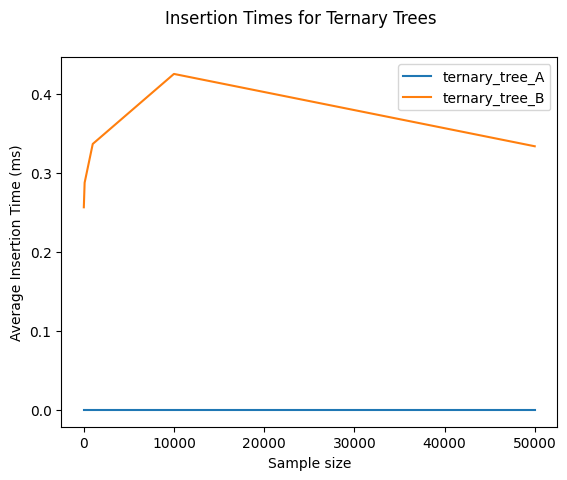

In [37]:
for tst_name, time_data in times.items():
    plt.plot(time_data.keys(), time_data.values(), label=tst_name)
    
plt.xlabel("Sample size")
plt.ylabel("Average Insertion Time (ms)")
plt.suptitle("Insertion Times for Ternary Trees")
plt.legend()


# Exact Searching time Assessment

In [41]:
nr_runs = 100
times = {"ternary_tree_A": {}, "ternary_tree_B": {}}
exact_search_sample = random.sample(words, k=20)

for sample in samples:
    tsts = {
    "ternary_tree_A": TernarySearchTree(),
    "ternary_tree_B": TernarySearchTreeB()
    }
    for word in sample:
        for tst_name, tst in tsts.items():
            tst.insert(word)
    
    for tst_name in tsts.keys():
        times[tst_name][len(sample)] = 0.0
        
    for _ in range(nr_runs):
        for tstname, tst in tsts.items():
            start_time = time.time_ns()
            for word in exact_search_sample:
                tst.search(word, exact=True)
            end_time = time.time_ns()
            times[tst_name][len(sample)] += end_time - start_time
    
    for tst_name in tsts.keys():
        times[tst_name][len(sample)] /= nr_runs * 1_000_000.0

times

{'ternary_tree_A': {10: 0.0, 100: 0.0, 1000: 0.0, 10000: 0.0, 50000: 0.0},
 'ternary_tree_B': {10: 0.0,
  100: 0.068064,
  1000: 0.116847,
  10000: 0.203907,
  50000: 0.333251}}

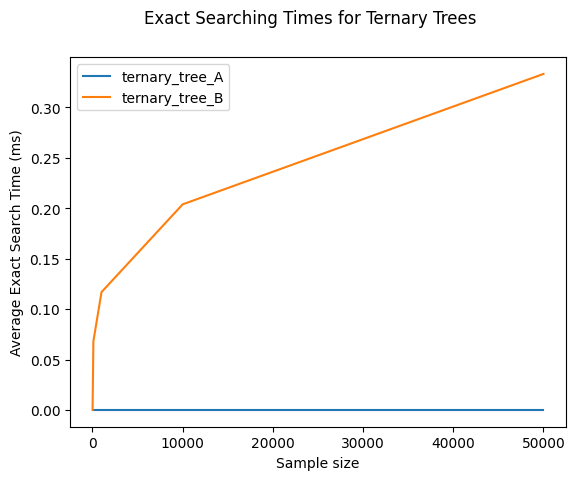

In [42]:
for tst_name, time_data in times.items():
    plt.plot(time_data.keys(), time_data.values(), label=tst_name)
    
plt.xlabel("Sample size")
plt.ylabel("Average Exact Search Time (ms)")
plt.suptitle("Exact Searching Times for Ternary Trees")
plt.legend()


# Prefixes Searching time Assessment

In [43]:
nr_runs = 100
times = {"ternary_tree_A": {}, "ternary_tree_B": {}}
search_sample = random.sample(words, k=20)

for sample in samples:
    tsts = {
    "ternary_tree_A": TernarySearchTree(),
    "ternary_tree_B": TernarySearchTreeB()
    }
    for word in sample:
        for tst_name, tst in tsts.items():
            tst.insert(word)
    
    for tst_name in tsts.keys():
        times[tst_name][len(sample)] = 0.0
        
    for _ in range(nr_runs):
        for tstname, tst in tsts.items():
            start_time = time.time_ns()
            for word in search_sample:
                tst.search(word, exact=False)
            end_time = time.time_ns()
            times[tst_name][len(sample)] += end_time - start_time
    
    for tst_name in tsts.keys():
        times[tst_name][len(sample)] /= nr_runs * 1_000_000.0

times

{'ternary_tree_A': {10: 0.0, 100: 0.0, 1000: 0.0, 10000: 0.0, 50000: 0.0},
 'ternary_tree_B': {10: 0.062743,
  100: 0.091076,
  1000: 0.162782,
  10000: 0.206505,
  50000: 0.16234}}

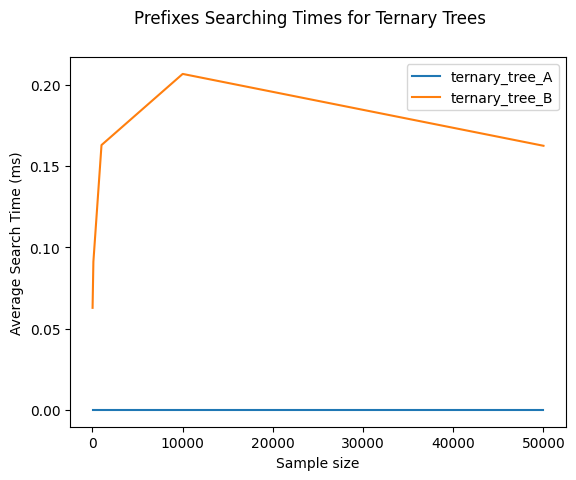

In [44]:
for tst_name, time_data in times.items():
    plt.plot(time_data.keys(), time_data.values(), label=tst_name)
    
plt.xlabel("Sample size")
plt.ylabel("Average Search Time (ms)")
plt.suptitle("Prefixes Searching Times for Ternary Trees")
plt.legend()
